# INM431 Machine Learning Coursework

## By Ho Yin Tam

Import the library.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency

Import the dataset.

In [5]:
# load the mushroom data
mushroom_raw = pd.read_table("agaricus-lepiota.data", delimiter = ',', header = None)
pd.set_option('display.max_columns', None)
mushroom_raw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [6]:
type(mushroom_raw)

pandas.core.frame.DataFrame

Replace the columns names.

In [7]:
# Set the column names 
mushroom_raw.columns = ['poisonous', 'cap_shape', 'cap_surface', 'cap_color',
                        'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size',
                        'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
                        'stalk_surface_below_ring', 'stalk_color_above_ring', 
                        'stalk_color_below_ring', 'veil_type', 'veil_color', 
                        'ring_number', 'ring_type', 'spore_print_color',
                        'population', 'habitat']
mushroom_raw

,poisonous,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


Checking any missing value.

In [8]:
# Check missing value
mushroom_raw.isnull().sum()

poisonous                   0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
dtype: int64

In [9]:
# mushroom_raw summary
mushroom_raw.describe().T

,count,unique,top,freq
poisonous,8124,2,e,4208
cap_shape,8124,6,x,3656
cap_surface,8124,4,y,3244
cap_color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill_attachment,8124,2,f,7914
gill_spacing,8124,2,c,6812
gill_size,8124,2,b,5612
gill_color,8124,12,b,1728


Check the unique values of each column.

In [10]:
# Unique values of each column
for i in mushroom_raw.columns:
    label = mushroom_raw[i].unique()
    print(i, ":", label)

poisonous : ['p' 'e']
cap_shape : ['x' 'b' 's' 'f' 'k' 'c']
cap_surface : ['s' 'y' 'f' 'g']
cap_color : ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises : ['t' 'f']
odor : ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill_attachment : ['f' 'a']
gill_spacing : ['c' 'w']
gill_size : ['n' 'b']
gill_color : ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk_shape : ['e' 't']
stalk_root : ['e' 'c' 'b' 'r' '?']
stalk_surface_above_ring : ['s' 'f' 'k' 'y']
stalk_surface_below_ring : ['s' 'f' 'y' 'k']
stalk_color_above_ring : ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk_color_below_ring : ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil_type : ['p']
veil_color : ['w' 'n' 'o' 'y']
ring_number : ['o' 't' 'n']
ring_type : ['p' 'e' 'l' 'f' 'n']
spore_print_color : ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population : ['s' 'n' 'a' 'v' 'y' 'c']
habitat : ['u' 'g' 'm' 'd' 'p' 'w' 'l']


Check the rows with '?'.

In [11]:
# Count number of '?'
print(mushroom_raw[mushroom_raw['stalk_root'] == '?'])

     poisonous cap_shape cap_surface cap_color bruises odor gill_attachment  \
3984         e         x           y         b       t    n               f   
4023         p         x           y         e       f    y               f   
4076         e         f           y         u       f    n               f   
4100         p         x           y         e       f    y               f   
4104         p         x           y         n       f    f               f   
...        ...       ...         ...       ...     ...  ...             ...   
8119         e         k           s         n       f    n               a   
8120         e         x           s         n       f    n               a   
8121         e         f           s         n       f    n               a   
8122         p         k           y         n       f    y               f   
8123         e         x           s         n       f    n               a   

     gill_spacing gill_size gill_color stalk_shape 

Rename the encoded value to their original form or text. And drop the column of stalk_root and veil_type.

In [12]:
# Poisonous
mushroom_raw.poisonous[mushroom_raw.poisonous == 'e'] = 'edible'
mushroom_raw.poisonous[mushroom_raw.poisonous == 'p'] = 'poisonous'

# Cap_shape
mushroom_raw['cap_shape'] = mushroom_raw['cap_shape'].replace('b', 'bell')
mushroom_raw['cap_shape'] = mushroom_raw['cap_shape'].replace('c', 'conical')
mushroom_raw['cap_shape'] = mushroom_raw['cap_shape'].replace('x', 'convex')
mushroom_raw['cap_shape'] = mushroom_raw['cap_shape'].replace('f', 'flat')
mushroom_raw['cap_shape'] = mushroom_raw['cap_shape'].replace('k', 'knobbed')
mushroom_raw['cap_shape'] = mushroom_raw['cap_shape'].replace('s', 'sunken')

# Cap_surface
mushroom_raw['cap_surface'] = mushroom_raw['cap_surface'].replace('f', 'fibrous')
mushroom_raw['cap_surface'] = mushroom_raw['cap_surface'].replace('g', 'grooves')
mushroom_raw['cap_surface'] = mushroom_raw['cap_surface'].replace('y', 'scaly')
mushroom_raw['cap_surface'] = mushroom_raw['cap_surface'].replace('s', 'smooth')

# Cap_color
mushroom_raw['cap_color'] = mushroom_raw['cap_color'].replace('n', 'brown')
mushroom_raw['cap_color'] = mushroom_raw['cap_color'].replace('b', 'buff')
mushroom_raw['cap_color'] = mushroom_raw['cap_color'].replace('c', 'cinnamon')
mushroom_raw['cap_color'] = mushroom_raw['cap_color'].replace('g', 'gray')
mushroom_raw['cap_color'] = mushroom_raw['cap_color'].replace('p', 'pink')
mushroom_raw['cap_color'] = mushroom_raw['cap_color'].replace('u', 'purple')
mushroom_raw['cap_color'] = mushroom_raw['cap_color'].replace('e', 'red')
mushroom_raw['cap_color'] = mushroom_raw['cap_color'].replace('y', 'yellow')
mushroom_raw['cap_color'] = mushroom_raw['cap_color'].replace('w', 'white')
mushroom_raw['cap_color'] = mushroom_raw['cap_color'].replace('r', 'green')

# Bruises
mushroom_raw['bruises'] = mushroom_raw['bruises'].replace('t', 'bruises')
mushroom_raw['bruises'] = mushroom_raw['bruises'].replace('f', 'no')

# Odor
mushroom_raw['odor'] = mushroom_raw['odor'].replace('a', 'almond')
mushroom_raw['odor'] = mushroom_raw['odor'].replace('l', 'anise')
mushroom_raw['odor'] = mushroom_raw['odor'].replace('c', 'creosote')
mushroom_raw['odor'] = mushroom_raw['odor'].replace('y', 'fishy')
mushroom_raw['odor'] = mushroom_raw['odor'].replace('f', 'foul')
mushroom_raw['odor'] = mushroom_raw['odor'].replace('m', 'musty')
mushroom_raw['odor'] = mushroom_raw['odor'].replace('n', 'none')
mushroom_raw['odor'] = mushroom_raw['odor'].replace('p', 'pungent')
mushroom_raw['odor'] = mushroom_raw['odor'].replace('s', 'spicy')

# Gill_attachment
mushroom_raw['gill_attachment'] = mushroom_raw['gill_attachment'].replace('f', 'free')
mushroom_raw['gill_attachment'] = mushroom_raw['gill_attachment'].replace('a', 'attached')


# Gill_spacing
mushroom_raw['gill_spacing'] = mushroom_raw['gill_spacing'].replace('c', 'close')
mushroom_raw['gill_spacing'] = mushroom_raw['gill_spacing'].replace('w', 'crowded')

# Gill_size
mushroom_raw['gill_size'] = mushroom_raw['gill_size'].replace('b', 'broad')
mushroom_raw['gill_size'] = mushroom_raw['gill_size'].replace('n', 'narrow')

# Gill_color
mushroom_raw['gill_color'] = mushroom_raw['gill_color'].replace('k', 'black')
mushroom_raw['gill_color'] = mushroom_raw['gill_color'].replace('n', 'brown')
mushroom_raw['gill_color'] = mushroom_raw['gill_color'].replace('b', 'buff')
mushroom_raw['gill_color'] = mushroom_raw['gill_color'].replace('h', 'chocolate')
mushroom_raw['gill_color'] = mushroom_raw['gill_color'].replace('g', 'gray')
mushroom_raw['gill_color'] = mushroom_raw['gill_color'].replace('r', 'green')
mushroom_raw['gill_color'] = mushroom_raw['gill_color'].replace('o', 'orange')
mushroom_raw['gill_color'] = mushroom_raw['gill_color'].replace('p', 'pink')
mushroom_raw['gill_color'] = mushroom_raw['gill_color'].replace('u', 'purple')
mushroom_raw['gill_color'] = mushroom_raw['gill_color'].replace('e', 'red')
mushroom_raw['gill_color'] = mushroom_raw['gill_color'].replace('w', 'white')
mushroom_raw['gill_color'] = mushroom_raw['gill_color'].replace('y', 'yellow')

# Stalk_shape
mushroom_raw['stalk_shape'] = mushroom_raw['stalk_shape'].replace('e', 'enlarging')
mushroom_raw['stalk_shape'] = mushroom_raw['stalk_shape'].replace('t', 'tapering')

# Stalk_root
mushroom_raw['stalk_root'] = mushroom_raw['stalk_root'].replace('c', 'club')
mushroom_raw['stalk_root'] = mushroom_raw['stalk_root'].replace('e', 'equal')
mushroom_raw['stalk_root'] = mushroom_raw['stalk_root'].replace('b', 'bulbous')
mushroom_raw['stalk_root'] = mushroom_raw['stalk_root'].replace('r', 'rooted')

# Stalk_surface_above_ring
mushroom_raw['stalk_surface_above_ring'] = mushroom_raw['stalk_surface_above_ring'].replace('f', 'fibrous')
mushroom_raw['stalk_surface_above_ring'] = mushroom_raw['stalk_surface_above_ring'].replace('y', 'scaly')
mushroom_raw['stalk_surface_above_ring'] = mushroom_raw['stalk_surface_above_ring'].replace('k', 'silky')
mushroom_raw['stalk_surface_above_ring'] = mushroom_raw['stalk_surface_above_ring'].replace('s', 'smooth')

# Stalk_surface_below_ring
mushroom_raw['stalk_surface_below_ring'] = mushroom_raw['stalk_surface_below_ring'].replace('f', 'fibrous')
mushroom_raw['stalk_surface_below_ring'] = mushroom_raw['stalk_surface_below_ring'].replace('y', 'scaly')
mushroom_raw['stalk_surface_below_ring'] = mushroom_raw['stalk_surface_below_ring'].replace('k', 'silky')
mushroom_raw['stalk_surface_below_ring'] = mushroom_raw['stalk_surface_below_ring'].replace('s', 'smooth')

# Stalk_color_above_ring
mushroom_raw['stalk_color_above_ring'] = mushroom_raw['stalk_color_above_ring'].replace('n', 'brown')
mushroom_raw['stalk_color_above_ring'] = mushroom_raw['stalk_color_above_ring'].replace('b', 'buff')
mushroom_raw['stalk_color_above_ring'] = mushroom_raw['stalk_color_above_ring'].replace('c', 'cinnamon')
mushroom_raw['stalk_color_above_ring'] = mushroom_raw['stalk_color_above_ring'].replace('g', 'gray')
mushroom_raw['stalk_color_above_ring'] = mushroom_raw['stalk_color_above_ring'].replace('o', 'orange')
mushroom_raw['stalk_color_above_ring'] = mushroom_raw['stalk_color_above_ring'].replace('p', 'pink')
mushroom_raw['stalk_color_above_ring'] = mushroom_raw['stalk_color_above_ring'].replace('e', 'red')
mushroom_raw['stalk_color_above_ring'] = mushroom_raw['stalk_color_above_ring'].replace('w', 'white')
mushroom_raw['stalk_color_above_ring'] = mushroom_raw['stalk_color_above_ring'].replace('y', 'yellow')

# Stalk_color_below_ring
mushroom_raw['stalk_color_below_ring'] = mushroom_raw['stalk_color_below_ring'].replace('n', 'brown')
mushroom_raw['stalk_color_below_ring'] = mushroom_raw['stalk_color_below_ring'].replace('b', 'buff')
mushroom_raw['stalk_color_below_ring'] = mushroom_raw['stalk_color_below_ring'].replace('c', 'cinnamon')
mushroom_raw['stalk_color_below_ring'] = mushroom_raw['stalk_color_below_ring'].replace('g', 'gray')
mushroom_raw['stalk_color_below_ring'] = mushroom_raw['stalk_color_below_ring'].replace('o', 'orange')
mushroom_raw['stalk_color_below_ring'] = mushroom_raw['stalk_color_below_ring'].replace('p', 'pink')
mushroom_raw['stalk_color_below_ring'] = mushroom_raw['stalk_color_below_ring'].replace('e', 'red')
mushroom_raw['stalk_color_below_ring'] = mushroom_raw['stalk_color_below_ring'].replace('w', 'white')
mushroom_raw['stalk_color_below_ring'] = mushroom_raw['stalk_color_below_ring'].replace('y', 'yellow')

# Veil_type
mushroom_raw['veil_type'] = mushroom_raw['veil_type'].replace('p', 'partial')
mushroom_raw['veil_type'] = mushroom_raw['veil_type'].replace('u', 'universal')

# Veil_color
mushroom_raw['veil_color'] = mushroom_raw['veil_color'].replace('w', 'white')
mushroom_raw['veil_color'] = mushroom_raw['veil_color'].replace('y', 'yellow')
mushroom_raw['veil_color'] = mushroom_raw['veil_color'].replace('n', 'brown')
mushroom_raw['veil_color'] = mushroom_raw['veil_color'].replace('o', 'orange')

# Ring_number
mushroom_raw['ring_number'] = mushroom_raw['ring_number'].replace('n', 'none')
mushroom_raw['ring_number'] = mushroom_raw['ring_number'].replace('o', 'one')
mushroom_raw['ring_number'] = mushroom_raw['ring_number'].replace('t', 'two')

# Ring_type
mushroom_raw['ring_type'] = mushroom_raw['ring_type'].replace('c', 'cobwebby')
mushroom_raw['ring_type'] = mushroom_raw['ring_type'].replace('e', 'evanescent')
mushroom_raw['ring_type'] = mushroom_raw['ring_type'].replace('f', 'flaring')
mushroom_raw['ring_type'] = mushroom_raw['ring_type'].replace('l', 'large')
mushroom_raw['ring_type'] = mushroom_raw['ring_type'].replace('n', 'none')
mushroom_raw['ring_type'] = mushroom_raw['ring_type'].replace('p', 'pendant')
mushroom_raw['ring_type'] = mushroom_raw['ring_type'].replace('s', 'sheathing')
mushroom_raw['ring_type'] = mushroom_raw['ring_type'].replace('z', 'zone')

# Spore_print_color
mushroom_raw['spore_print_color'] = mushroom_raw['spore_print_color'].replace('k', 'black')
mushroom_raw['spore_print_color'] = mushroom_raw['spore_print_color'].replace('n', 'brown')
mushroom_raw['spore_print_color'] = mushroom_raw['spore_print_color'].replace('b', 'buff')
mushroom_raw['spore_print_color'] = mushroom_raw['spore_print_color'].replace('h', 'chocolate')
mushroom_raw['spore_print_color'] = mushroom_raw['spore_print_color'].replace('r', 'green')
mushroom_raw['spore_print_color'] = mushroom_raw['spore_print_color'].replace('o', 'orange')
mushroom_raw['spore_print_color'] = mushroom_raw['spore_print_color'].replace('u', 'purple')
mushroom_raw['spore_print_color'] = mushroom_raw['spore_print_color'].replace('w', 'white')
mushroom_raw['spore_print_color'] = mushroom_raw['spore_print_color'].replace('y', 'yellow')

# Population
mushroom_raw['population'] = mushroom_raw['population'].replace('a', 'abundant')
mushroom_raw['population'] = mushroom_raw['population'].replace('c', 'clustered')
mushroom_raw['population'] = mushroom_raw['population'].replace('n', 'numerous')
mushroom_raw['population'] = mushroom_raw['population'].replace('s', 'scattered')
mushroom_raw['population'] = mushroom_raw['population'].replace('v', 'several')
mushroom_raw['population'] = mushroom_raw['population'].replace('y', 'solitary')

# Habitat
mushroom_raw['habitat'] = mushroom_raw['habitat'].replace('g', 'grasses')
mushroom_raw['habitat'] = mushroom_raw['habitat'].replace('l', 'leaves')
mushroom_raw['habitat'] = mushroom_raw['habitat'].replace('m', 'meadows')
mushroom_raw['habitat'] = mushroom_raw['habitat'].replace('p', 'paths')
mushroom_raw['habitat'] = mushroom_raw['habitat'].replace('u', 'urban')
mushroom_raw['habitat'] = mushroom_raw['habitat'].replace('w', 'waste')
mushroom_raw['habitat'] = mushroom_raw['habitat'].replace('d', 'woods')

# Drop the column of stalk_root and veil_type
mushroom = mushroom_raw.drop(columns = {"stalk_root", 'veil_type'})

#print out
mushroom

,poisonous,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,smooth,smooth,white,white,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,smooth,smooth,white,white,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,smooth,smooth,white,white,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,knobbed,smooth,brown,no,none,attached,close,broad,yellow,enlarging,smooth,smooth,orange,orange,orange,one,pendant,buff,clustered,leaves
8120,edible,convex,smooth,brown,no,none,attached,close,broad,yellow,enlarging,smooth,smooth,orange,orange,brown,one,pendant,buff,several,leaves
8121,edible,flat,smooth,brown,no,none,attached,close,broad,brown,enlarging,smooth,smooth,orange,orange,orange,one,pendant,buff,clustered,leaves
8122,poisonous,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,tapering,smooth,silky,white,white,white,one,evanescent,white,several,leaves


In [13]:
# mushroom summary
mushroom.describe().T

,count,unique,top,freq
poisonous,8124,2,edible,4208
cap_shape,8124,6,convex,3656
cap_surface,8124,4,scaly,3244
cap_color,8124,10,brown,2284
bruises,8124,2,no,4748
odor,8124,9,none,3528
gill_attachment,8124,2,free,7914
gill_spacing,8124,2,close,6812
gill_size,8124,2,broad,5612
gill_color,8124,12,buff,1728


Display the unique value of each column.

In [14]:
# Unique values of each column
for i in mushroom.columns:
    label = mushroom[i].unique()
    print(i, ":", label)

poisonous : ['poisonous' 'edible']
cap_shape : ['convex' 'bell' 'sunken' 'flat' 'knobbed' 'conical']
cap_surface : ['smooth' 'scaly' 'fibrous' 'grooves']
cap_color : ['brown' 'yellow' 'white' 'gray' 'red' 'pink' 'buff' 'purple' 'cinnamon'
 'green']
bruises : ['bruises' 'no']
odor : ['pungent' 'almond' 'anise' 'none' 'foul' 'creosote' 'fishy' 'spicy'
 'musty']
gill_attachment : ['free' 'attached']
gill_spacing : ['close' 'crowded']
gill_size : ['narrow' 'broad']
gill_color : ['black' 'brown' 'gray' 'pink' 'white' 'chocolate' 'purple' 'red' 'buff'
 'green' 'yellow' 'orange']
stalk_shape : ['enlarging' 'tapering']
stalk_surface_above_ring : ['smooth' 'fibrous' 'silky' 'scaly']
stalk_surface_below_ring : ['smooth' 'fibrous' 'scaly' 'silky']
stalk_color_above_ring : ['white' 'gray' 'pink' 'brown' 'buff' 'red' 'orange' 'cinnamon' 'yellow']
stalk_color_below_ring : ['white' 'pink' 'gray' 'buff' 'brown' 'red' 'yellow' 'orange' 'cinnamon']
veil_color : ['white' 'brown' 'orange' 'yellow']
ring_n

Display the target label with historgram.

In [15]:
# Get the target
target = np.unique(mushroom.poisonous, return_counts=True)
target

(array(['edible', 'poisonous'], dtype=object),
 array([4208, 3916], dtype=int64))

In [16]:
print(target[1])
print(target[0])

[4208 3916]
['edible' 'poisonous']


In [17]:
# Calculate the percentage
total = len(mushroom.poisonous)
total
percentages = target[1]/total*100
percentages

array([51.79714426, 48.20285574])

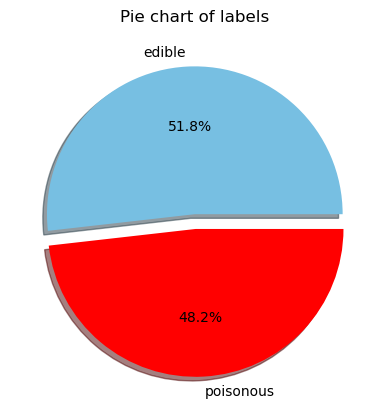

In [18]:
# Pie chart
explode = [0, 0.1]
plt.pie(target[1], labels = target[0], autopct = '%1.1f%%', shadow = True, colors = ['#77BFE2', 'red'], explode = explode)
plt.title('Pie chart of labels')
plt.show()

Create the historgram.

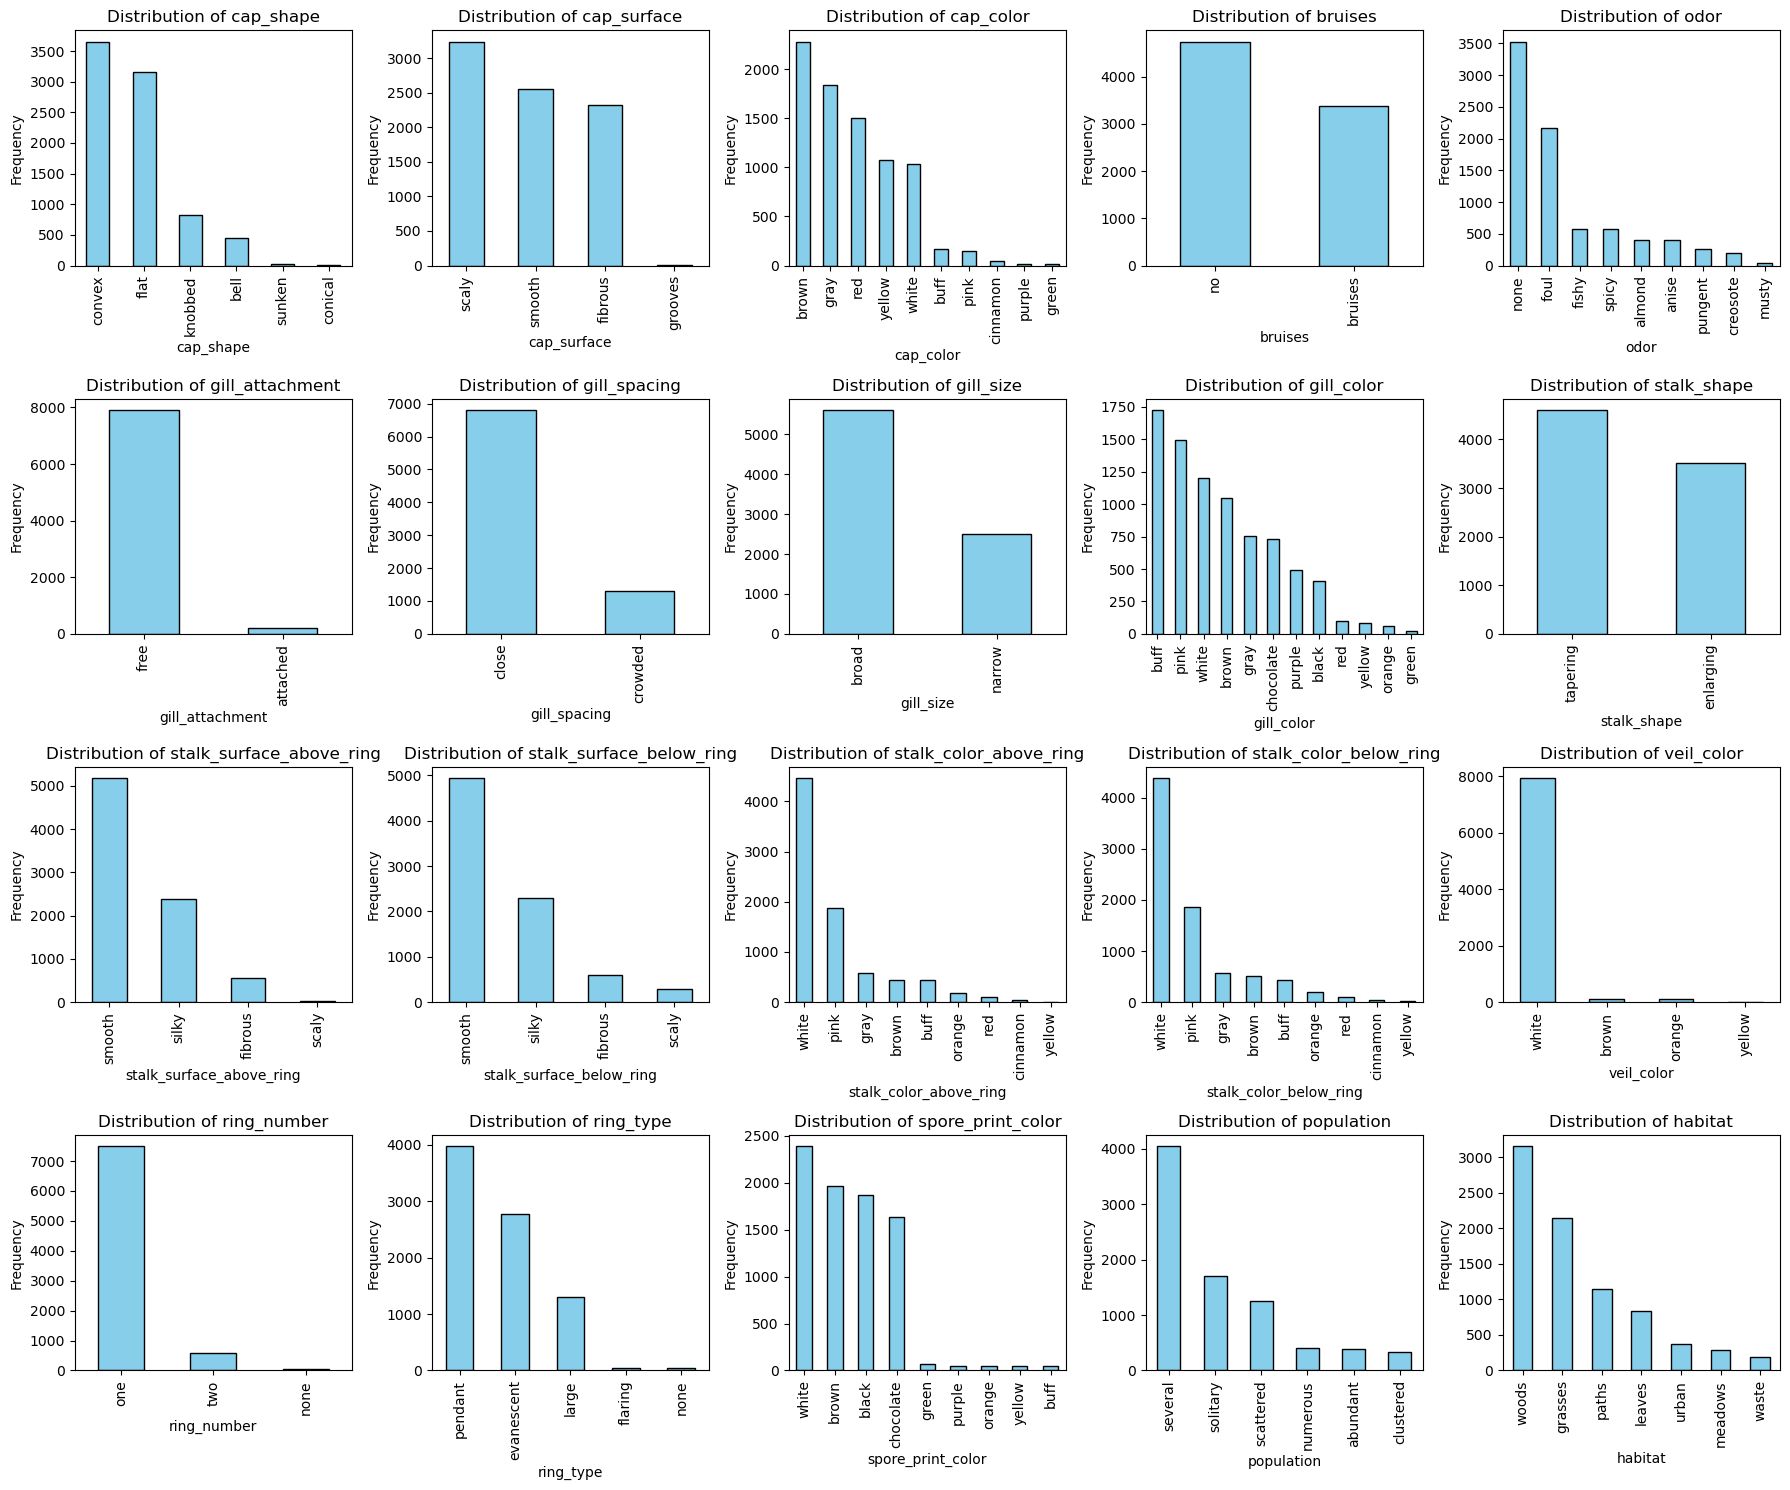

In [19]:
# Features
features = mushroom.columns[1:]

# Create subplots
fig, axes = plt.subplots(4, 5, figsize=(18, 15))

# Flatten the 2D array of subplots
axes = axes.flatten()

# Plot bar charts for each feature
for i, feature in enumerate(features):
        mushroom[feature].value_counts().plot(kind='bar', color='skyblue', edgecolor='black', ax=axes[i])
        axes[i].set_title(f'Distribution of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Visualize heatmap.

In [ ]:
# build Cramer's V function
def cramers_v(var1, var2):
    crosstab = np.array(pd.crosstab(var1, var2, rownames = None, colnames = None))
    stat = chi2_contingency(crosstab)[0]
    num_observations = np.sum(crosstab)
    minimum_val = min(crosstab.shape) - 1
    return (stat/(num_observations*minimum_val))

In [21]:
# build the matrix
rows = []
for var1 in mushroom:
    col = []
    for var2 in mushroom:
        cramers = cramers_v(mushroom[var1], mushroom[var2])
        col.append(round(cramers, 2))
    rows.append(col)    
    
cramers_results = np.array(rows)
mushroom_cramers = pd.DataFrame(cramers_results, columns = mushroom.columns, index = mushroom.columns)
mushroom_cramers

,poisonous,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
poisonous,1.00,0.06,0.04,0.05,0.25,0.94,0.02,0.12,0.29,0.46,0.01,0.35,0.33,0.28,0.26,0.02,0.05,0.36,0.57,0.24,0.19
cap_shape,0.06,1.00,0.04,0.03,0.07,0.06,0.02,0.01,0.12,0.06,0.09,0.03,0.01,0.05,0.03,0.05,0.04,0.04,0.06,0.06,0.07
cap_surface,0.04,0.04,1.00,0.05,0.02,0.06,0.04,0.11,0.08,0.07,0.01,0.02,0.03,0.06,0.07,0.02,0.01,0.05,0.05,0.07,0.06
cap_color,0.05,0.03,0.05,1.00,0.05,0.11,0.06,0.16,0.22,0.08,0.35,0.07,0.10,0.08,0.08,0.02,0.11,0.31,0.08,0.09,0.11
bruises,0.25,0.07,0.02,0.05,1.00,0.44,0.02,0.09,0.14,0.42,0.01,0.33,0.32,0.23,0.24,0.02,0.01,0.59,0.38,0.09,0.28
odor,0.94,0.06,0.06,0.11,0.44,1.00,0.07,0.18,0.58,0.15,0.33,0.17,0.26,0.20,0.20,0.01,0.55,0.49,0.16,0.14,0.14
gill_attachment,0.02,0.02,0.04,0.06,0.02,0.07,1.00,0.00,0.01,0.61,0.03,0.01,0.02,0.96,0.96,0.91,0.04,0.06,0.68,0.17,0.19
gill_spacing,0.12,0.01,0.11,0.16,0.09,0.18,0.00,1.00,0.01,0.11,0.01,0.19,0.17,0.16,0.14,0.01,0.06,0.08,0.10,0.45,0.29
gill_size,0.29,0.12,0.08,0.22,0.14,0.58,0.01,0.01,1.00,0.61,0.05,0.03,0.02,0.13,0.12,0.01,0.04,0.33,0.44,0.27,0.25
gill_color,0.46,0.06,0.07,0.08,0.42,0.15,0.61,0.11,0.61,1.00,0.37,0.13,0.14,0.18,0.17,0.21,0.20,0.27,0.24,0.18,0.21


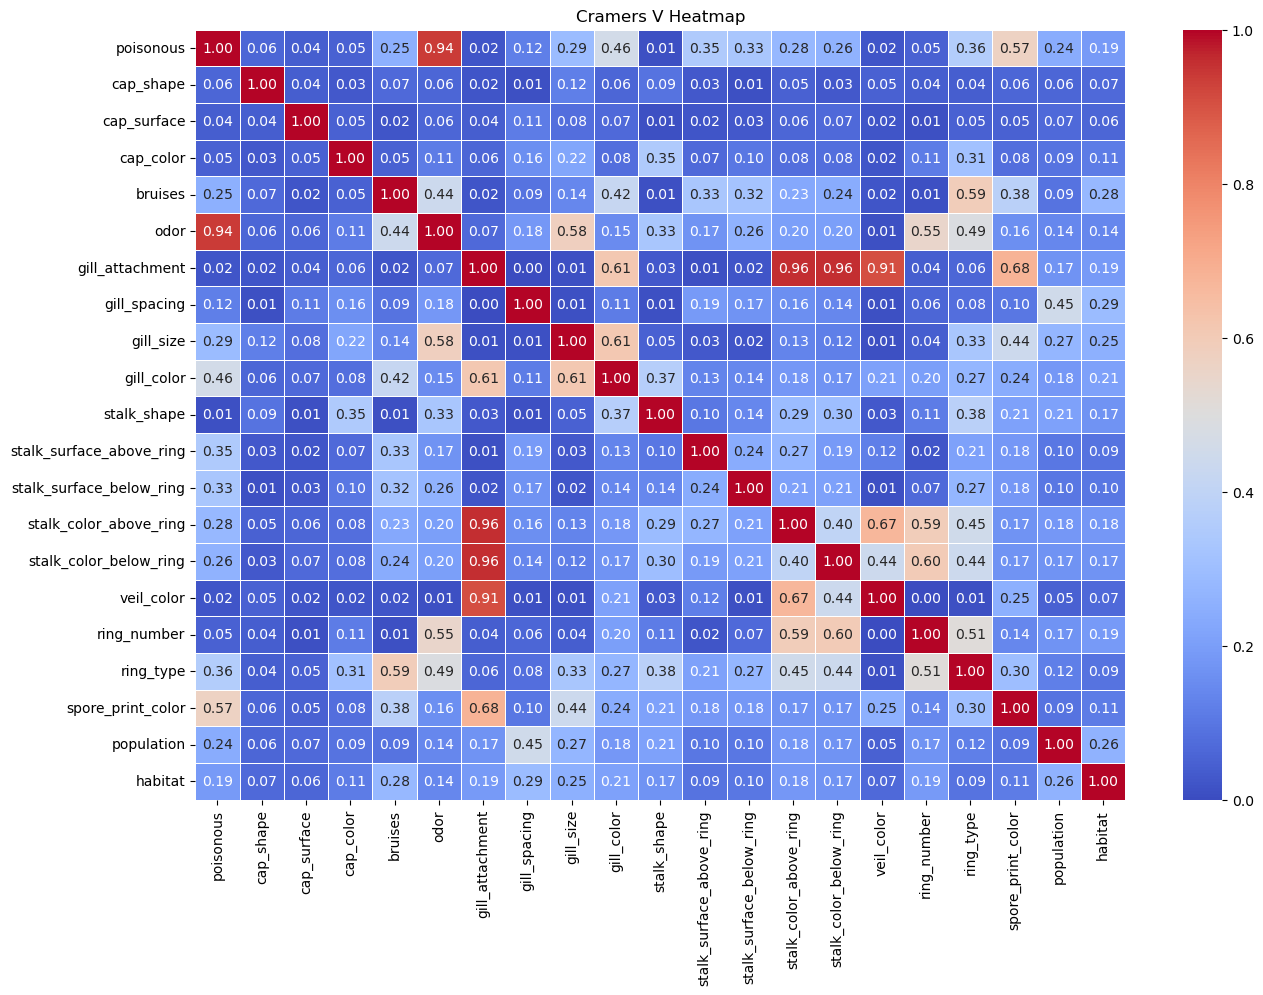

In [22]:
# visualize the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(data = mushroom_cramers, annot = True, cmap='coolwarm', fmt=".2f", linewidths = 0.5)
plt.title('Cramers V Heatmap')
plt.show()